# Lending Club Case Study - Exploratory Data Analysis

##### TEAM MEMBERS:
- ANIKET GUPTA
- DARSHJYOT SINGH NEGI

##### Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

###### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 115)

%matplotlib inline

## DATA LOADING

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,

## DATA CLEANING

In [3]:
df.shape

(39717, 111)

###### There are 111 columns.

In [4]:
df.isnull().sum()/len(df) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [5]:
null_count = df.isnull().sum()
null_count[null_count == len(df)].count()

54

###### 54 columns are having null values only. Droping these columns

In [6]:
null_columns = null_count[null_count == len(df)].index
null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
df.drop(null_columns, axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### mths_since_last_delinq, mths_since_last_record and next_pymnt_d are having more than 50% missing value. Removing these columns as these columns would not help in analysis

In [9]:
df.drop(list(columns_having_null[columns_having_null >= 50].index), axis=1, inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### dropping desc column also as purpose column cover can this

In [11]:
df.drop('desc', axis=1, inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,...,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,...,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,...,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,...,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,...,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [13]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [14]:
print(f'unique tax_liens: {df.tax_liens.unique()}')
print(f'unique delinq_amnt: {df.delinq_amnt.unique()}')
print(f'unique chargeoff_within_12_mths: {df.chargeoff_within_12_mths.unique()}')
print(f'unique acc_now_delinq: {df.acc_now_delinq.unique()}')
print(f'unique application_type: {df.application_type.unique()}')
print(f'unique policy_code: {df.policy_code.unique()}')
print(f'unique collections_12_mths_ex_med: {df.collections_12_mths_ex_med.unique()}')
print(f'unique initial_list_status: {df.initial_list_status.unique()}')
print(f'unique pymnt_plan: {df.pymnt_plan.unique()}')
print(f'unique pub_rec_bankruptcies: {df.pub_rec_bankruptcies.unique()}')
print(f'unique verification_status: {df.verification_status.unique()}')

unique tax_liens: [ 0. nan]
unique delinq_amnt: [0]
unique chargeoff_within_12_mths: [ 0. nan]
unique acc_now_delinq: [0]
unique application_type: ['INDIVIDUAL']
unique policy_code: [1]
unique collections_12_mths_ex_med: [ 0. nan]
unique initial_list_status: ['f']
unique pymnt_plan: ['n']
unique pub_rec_bankruptcies: [ 0.  1.  2. nan]
unique verification_status: ['Verified' 'Source Verified' 'Not Verified']


###### Removing following columns
- tax_liens: all values are zoro
- delinq_amnt: all values are zero
- chargeoff_within_12_mths: all values are zero
- acc_now_delinq: all values are zero
- application_type: all are INDIVIDUAL applocation. No contribution in analysis
- policy_code: all values are 1. No contribution in analysis
- collections_12_mths_ex_med: all values are zero
- initial_list_status: all values are 'f'. No contribution in analysis
- pymnt_plan: 
- id: A random number. No contribution in analysis
- member_id : A random number. No contribution in analysis
- url: A URL. No contribution in analysis
- funded_amnt: same as loan amount
- funded_amnt_inv: same as 
       

In [15]:
columns_to_remove = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 
                     'acc_now_delinq', 'application_type', 'policy_code', 
                     'collections_12_mths_ex_med', 'initial_list_status', 
                     'pymnt_plan', 'id', 'member_id', 'url', 'funded_amnt', 'funded_amnt_inv']
df.drop(columns_to_remove, axis=1, inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [16]:
df.shape

(39717, 39)

In [17]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [18]:
df.pub_rec_bankruptcies.value_counts().sort_values()

2.0        7
1.0     1674
0.0    37339
Name: pub_rec_bankruptcies, dtype: int64

###### pub_rec_bankruptcies has 1.75% null values. We can impute it using mod but it may result in wrong analysis. So we decided to drop null values

In [19]:
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
df.shape

(39020, 39)

In [20]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

###### emp_title could be a good factor for analysis. Null values could be intentional also or by mistake. So impute null value for this with 'UNKNOWN'

In [21]:
df.emp_title = df.emp_title.fillna('UNKNOWN')

In [22]:
columns_having_null = round(df.isnull().sum()/len(df) * 100, 2)
columns_having_null[columns_having_null > 0]

emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [23]:
df.emp_length.value_counts().sort_values()

9 years      1241
8 years      1454
7 years      1751
6 years      2197
1 year       3148
5 years      3249
4 years      3391
3 years      4034
2 years      4304
< 1 year     4416
10+ years    8760
Name: emp_length, dtype: int64

###### emp_length has 2.71% missing value. Imputing may result in wrong analysis, so removing this. Also removing other columns ahaving null values

In [24]:
df.dropna(subset=['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [25]:
round(df.isnull().sum()/len(df) * 100, 2)

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_re

In [26]:
df.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,UNKNOWN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,UNKNOWN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,5600,60 months,21.28%,152.39,F,F2,UNKNOWN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,5375,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [27]:
# fix precision for collection_recovery_fee, total_pymnt
df.collection_recovery_fee = round(df.collection_recovery_fee, 2)
df.total_pymnt = round(df.total_pymnt, 2)
df.total_rec_late_fee = round(df.total_rec_late_fee, 2) 

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,UNKNOWN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,UNKNOWN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


###### From above we can see that following columns are date columns. Let's change the datatype to date
- issue_d
- earliest_cr_line
- last_pymnt_d
- last_credit_pull_d

In [29]:
date_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df[date_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 4 columns):
issue_d               37825 non-null object
earliest_cr_line      37825 non-null object
last_pymnt_d          37825 non-null object
last_credit_pull_d    37825 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [30]:
# Converting the dtype of these columns to datetime
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [31]:
df[date_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 4 columns):
issue_d               37825 non-null datetime64[ns]
earliest_cr_line      37825 non-null datetime64[ns]
last_pymnt_d          37825 non-null datetime64[ns]
last_credit_pull_d    37825 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [32]:
# extract month and year from datetime columns
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year


In [33]:
df.earliest_cr_line_year.value_counts().sort_values()

2050       1
2046       1
2054       1
2056       1
2062       3
2064       4
2063       4
2065       7
2066       8
2068      14
2067      15
1969      26
1970      37
1972      38
1971      39
1973      47
1974      55
1975      66
1976      77
1977     101
1978     140
1979     145
2008     149
1980     162
1981     164
1982     202
1983     316
1984     375
1985     429
1986     468
1987     593
2007     685
1988     699
1989     813
1991     927
1990     979
1992    1009
2006    1119
1993    1439
2005    1444
2004    1696
2003    1787
2002    1848
1994    1932
1995    2054
1996    2183
1997    2354
2001    2438
1998    2741
1999    2868
2000    3122
Name: earliest_cr_line_year, dtype: int64

###### observation 
It seems there are date years > 2020. It may be becaise of y2k error

In [34]:
df.loc[df['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100
df.earliest_cr_line_year.value_counts().sort_values()

1946       1
1956       1
1950       1
1954       1
1962       3
1963       4
1964       4
1965       7
1966       8
1968      14
1967      15
1969      26
1970      37
1972      38
1971      39
1973      47
1974      55
1975      66
1976      77
1977     101
1978     140
1979     145
2008     149
1980     162
1981     164
1982     202
1983     316
1984     375
1985     429
1986     468
1987     593
2007     685
1988     699
1989     813
1991     927
1990     979
1992    1009
2006    1119
1993    1439
2005    1444
2004    1696
2003    1787
2002    1848
1994    1932
1995    2054
1996    2183
1997    2354
2001    2438
1998    2741
1999    2868
2000    3122
Name: earliest_cr_line_year, dtype: int64

In [35]:
df.last_pymnt_d_year.value_counts().sort_values()

2008      44
2009     427
2010    1587
2016    1976
2015    2377
2011    4636
2012    8691
2014    8925
2013    9162
Name: last_pymnt_d_year, dtype: int64

In [36]:
df.last_credit_pull_d_year.value_counts().sort_values()

2007        9
2008       19
2009      153
2010      667
2011     1979
2012     3930
2013     4992
2015     5303
2014     5972
2016    14801
Name: last_credit_pull_d_year, dtype: int64

In [37]:
df.loan_status.value_counts().sort_values()

Current         1098
Charged Off     5202
Fully Paid     31525
Name: loan_status, dtype: int64

In [38]:
# we can remove applicants who are in process of paying the installments as we are trying to identify risky applicants.
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [39]:
df.emp_length.value_counts().sort_values()

9 years      1205
8 years      1405
7 years      1684
6 years      2131
1 year       3061
5 years      3145
4 years      3281
3 years      3940
2 years      4196
< 1 year     4321
10+ years    8358
Name: emp_length, dtype: int64

In [40]:
# removing year from emp_length
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
df = df.replace({"emp_length": emp_length_dict })
df.emp_length.value_counts().sort_values()

9     1205
8     1405
7     1684
6     2131
1     3061
5     3145
4     3281
3     3940
2     4196
0     4321
10    8358
Name: emp_length, dtype: int64

In [41]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [42]:
# Dropping Duplicated rows if any
df.shape

(36727, 47)

In [43]:
df=df.drop_duplicates()
df.shape

(36727, 47)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36727 entries, 0 to 39680
Data columns (total 47 columns):
loan_amnt                   36727 non-null int64
term                        36727 non-null object
int_rate                    36727 non-null float64
installment                 36727 non-null float64
grade                       36727 non-null object
sub_grade                   36727 non-null object
emp_title                   36727 non-null object
emp_length                  36727 non-null int64
home_ownership              36727 non-null object
annual_inc                  36727 non-null float64
verification_status         36727 non-null object
issue_d                     36727 non-null datetime64[ns]
loan_status                 36727 non-null object
purpose                     36727 non-null object
title                       36727 non-null object
zip_code                    36727 non-null object
addr_state                  36727 non-null object
dti                         3672

### DATA ANALYSIS

###### Categorical Data which may contribute to analysis
- loan_status
- term
- grade
- sub_grade
- emp_title
- home_ownership
- verification_status
- issue_d_month
- purpose
- addr_state


###### Continuous Variable
- loan_amnt
- int_rate
- annual_inc
- emp_length
- dti
- inq_last_6mths
- open_acc
- pub_rec
- pub_rec_bankruptcies
- revol_bal
- revol_util
- total_acc

In [45]:
clean_df = df

In [46]:
clean_df.loan_status.value_counts().sort_values()

Charged Off     5202
Fully Paid     31525
Name: loan_status, dtype: int64

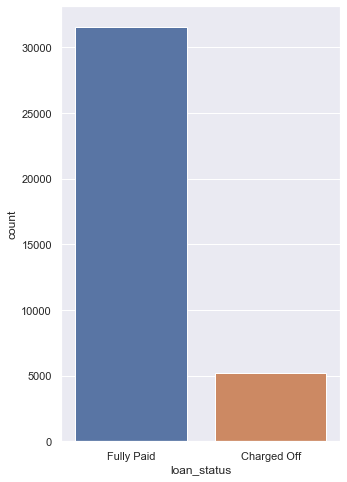

In [144]:
plt.figure(figsize=(5,8))
sns.countplot(clean_df['loan_status'])

###### Observation
5202 applicants marked as default

In [47]:
print("{}% are defaulters".format(round(clean_df[clean_df['loan_status'] == 'Charged Off'].loan_status.count()/len(clean_df) * 100, 2)))


14.16% are defaulters


###### loan_status is our target column

In [48]:
def plot(df, col, col_type, hue=None):
    '''
    THis function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    col_type : continuos or categorical
                Continuos(0)   : Distribution & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
    if col_type == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(25,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')

    if col_type == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df[col]))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

###### 1. term
Description: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [49]:
loan_status_for_term = clean_df.groupby(['term', 'loan_status']).loan_amnt.count()
loan_status_for_term

term        loan_status
 36 months  Charged Off     2895
            Fully Paid     24596
 60 months  Charged Off     2307
            Fully Paid      6929
Name: loan_amnt, dtype: int64

In [50]:
loan_status_for_term.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

term        loan_status
 36 months  Charged Off    10.530719
            Fully Paid     89.469281
 60 months  Charged Off    24.978346
            Fully Paid     75.021654
Name: loan_amnt, dtype: float64

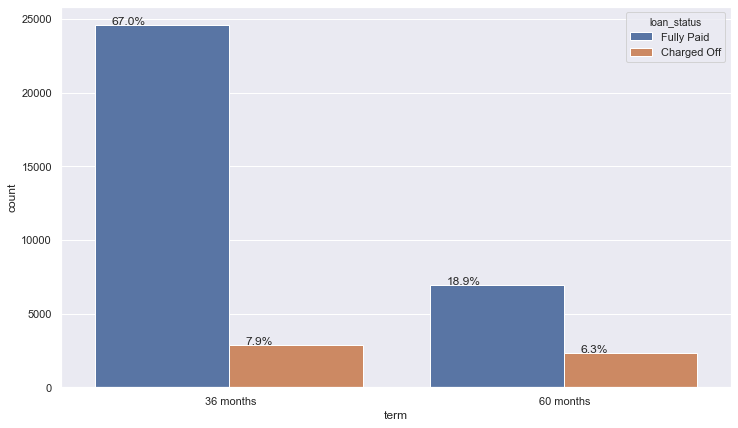

In [51]:
plot(clean_df, 'term', col_type=1, hue='loan_status')

###### Observation: 75% of applicants applied loan for 36 months term period.

###### 2. grade
Description: LC assigned loan grade

In [52]:
loan_status_for_grade = clean_df.groupby(['grade', 'loan_status']).loan_amnt.count()
loan_status_for_grade

grade  loan_status
A      Charged Off     546
       Fully Paid     8965
B      Charged Off    1313
       Fully Paid     9820
C      Charged Off    1229
       Fully Paid     6222
D      Charged Off    1036
       Fully Paid     3800
E      Charged Off     678
       Fully Paid     1888
F      Charged Off     304
       Fully Paid      634
G      Charged Off      96
       Fully Paid      196
Name: loan_amnt, dtype: int64

In [53]:
loan_status_for_grade.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

grade  loan_status
A      Charged Off     5.740721
       Fully Paid     94.259279
B      Charged Off    11.793766
       Fully Paid     88.206234
C      Charged Off    16.494430
       Fully Paid     83.505570
D      Charged Off    21.422663
       Fully Paid     78.577337
E      Charged Off    26.422447
       Fully Paid     73.577553
F      Charged Off    32.409382
       Fully Paid     67.590618
G      Charged Off    32.876712
       Fully Paid     67.123288
Name: loan_amnt, dtype: float64

###### Observation: % of defaulters increase with grade. Loan with Grade E, F and G likely to get more defaulters

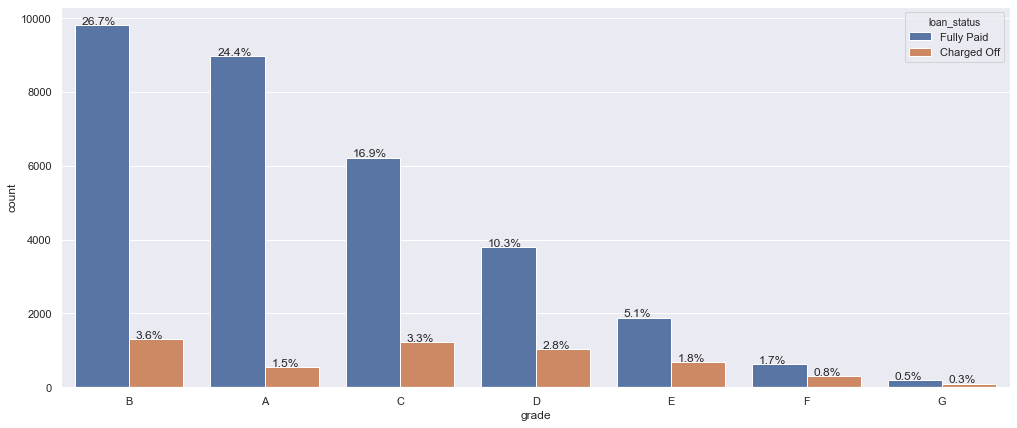

In [54]:
plot(clean_df, 'grade', col_type=1, hue='loan_status')

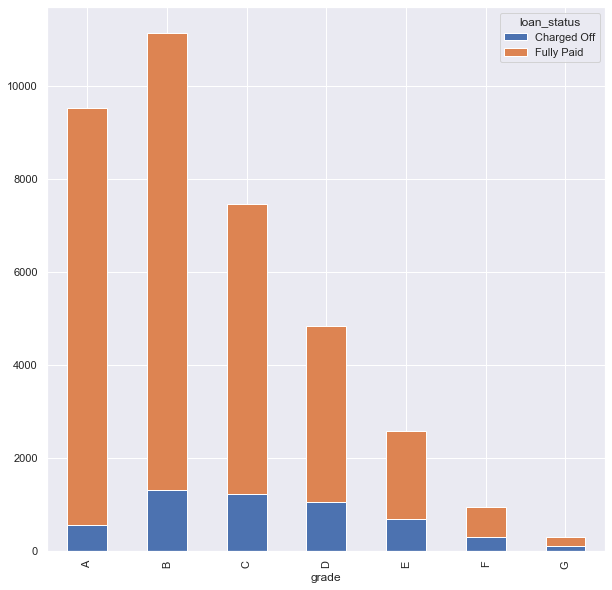

In [55]:
clean_df.groupby(['grade', 'loan_status']).loan_amnt.count().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

###### 3. sub_grade
Description: LC assigned loan subgrade

In [56]:
loan_status_for_subgrade = clean_df.groupby(['sub_grade', 'loan_status']).loan_amnt.count()
loan_status_for_subgrade

sub_grade  loan_status
A1         Charged Off      24
           Fully Paid     1017
A2         Charged Off      66
           Fully Paid     1344
A3         Charged Off      86
           Fully Paid     1614
A4         Charged Off     167
           Fully Paid     2595
A5         Charged Off     203
           Fully Paid     2395
B1         Charged Off     147
           Fully Paid     1529
B2         Charged Off     202
           Fully Paid     1695
B3         Charged Off     321
           Fully Paid     2387
B4         Charged Off     306
           Fully Paid     2032
B5         Charged Off     337
           Fully Paid     2177
C1         Charged Off     306
           Fully Paid     1652
C2         Charged Off     293
           Fully Paid     1562
C3         Charged Off     248
           Fully Paid     1167
C4         Charged Off     193
           Fully Paid      943
C5         Charged Off     189
           Fully Paid      898
D1         Charged Off     153
           Fully

In [57]:
loan_status_for_subgrade.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

sub_grade  loan_status
A1         Charged Off     2.305476
           Fully Paid     97.694524
A2         Charged Off     4.680851
           Fully Paid     95.319149
A3         Charged Off     5.058824
           Fully Paid     94.941176
A4         Charged Off     6.046343
           Fully Paid     93.953657
A5         Charged Off     7.813703
           Fully Paid     92.186297
B1         Charged Off     8.770883
           Fully Paid     91.229117
B2         Charged Off    10.648392
           Fully Paid     89.351608
B3         Charged Off    11.853767
           Fully Paid     88.146233
B4         Charged Off    13.088109
           Fully Paid     86.911891
B5         Charged Off    13.404932
           Fully Paid     86.595068
C1         Charged Off    15.628192
           Fully Paid     84.371808
C2         Charged Off    15.795148
           Fully Paid     84.204852
C3         Charged Off    17.526502
           Fully Paid     82.473498
C4         Charged Off    16.989437
     

###### Observation: subgrade A and B has least % of Charged Off compared to other subgrade

###### 4. emp_title
Description: The job title supplied by the Borrower when applying for the loan.

In [58]:
clean_df.emp_title.nunique()

27415

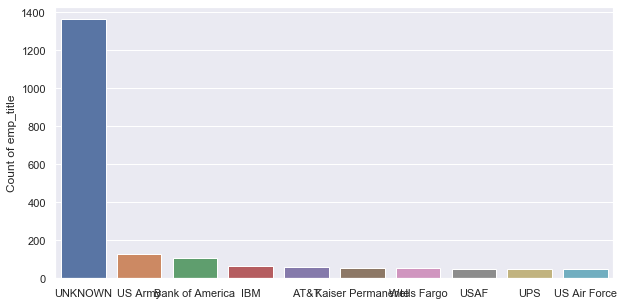

In [59]:
top10_emp_title = clean_df.emp_title.value_counts().head(10)
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

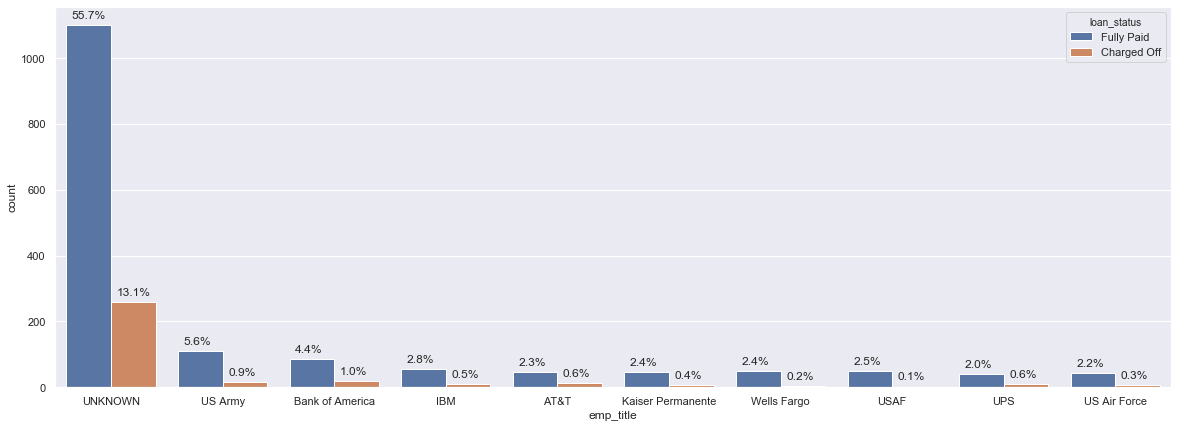

In [60]:

plot(clean_df[clean_df['emp_title'].isin(top10_emp_title.index.values)],col='emp_title',col_type=1,hue='loan_status')


###### Observation: applicants with UNKNOWN/NA/NOT_GIVEN emp_title are more likely to be charged_off

###### 5. home_ownership
Description: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [61]:
home_ownership_wise = clean_df.groupby(['home_ownership', 'loan_status']).loan_amnt.count()
home_ownership_wise

home_ownership  loan_status
MORTGAGE        Charged Off     2183
                Fully Paid     14135
OTHER           Charged Off       18
                Fully Paid        78
OWN             Charged Off      382
                Fully Paid      2315
RENT            Charged Off     2619
                Fully Paid     14997
Name: loan_amnt, dtype: int64

In [62]:
home_ownership_wise.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

home_ownership  loan_status
MORTGAGE        Charged Off    13.377865
                Fully Paid     86.622135
OTHER           Charged Off    18.750000
                Fully Paid     81.250000
OWN             Charged Off    14.163886
                Fully Paid     85.836114
RENT            Charged Off    14.867166
                Fully Paid     85.132834
Name: loan_amnt, dtype: float64

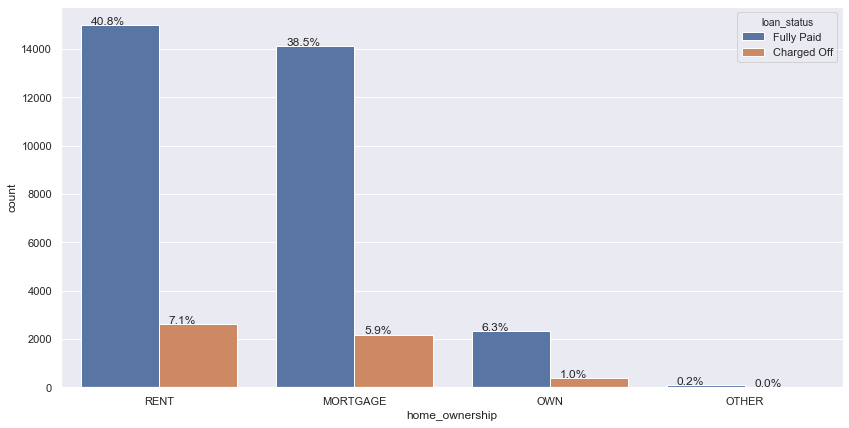

In [63]:
plot(clean_df,col='home_ownership',col_type=1,hue='loan_status')

###### Observation: 48% of applicants are living in rented home whereas 45% applicants were mortagaged their home.

###### 6. verification_status
Description: Indicates if income was verified by LC, not verified, or if the income source was verified

In [64]:
verification_status = clean_df.groupby(['verification_status', 'loan_status']).loan_amnt.count()
verification_status

verification_status  loan_status
Not Verified         Charged Off     1891
                     Fully Paid     13626
Source Verified      Charged Off     1380
                     Fully Paid      8086
Verified             Charged Off     1931
                     Fully Paid      9813
Name: loan_amnt, dtype: int64

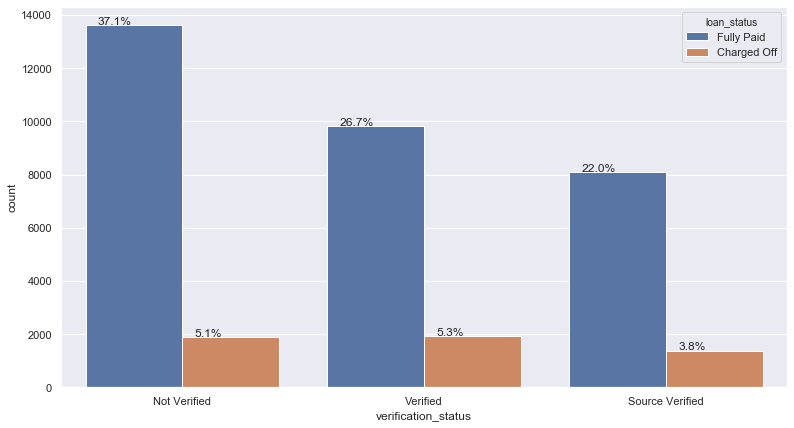

In [65]:
plot(clean_df,col='verification_status',col_type=1,hue='loan_status')

###### 7. issue_d_month

In [66]:
issue_d_month_wise = clean_df.groupby(['issue_d_month', 'loan_status']).loan_amnt.count()
issue_d_month_wise

issue_d_month  loan_status
1              Charged Off     279
               Fully Paid     1879
2              Charged Off     240
               Fully Paid     1866
3              Charged Off     308
               Fully Paid     2194
4              Charged Off     351
               Fully Paid     2399
5              Charged Off     439
               Fully Paid     2391
6              Charged Off     451
               Fully Paid     2626
7              Charged Off     453
               Fully Paid     2755
8              Charged Off     443
               Fully Paid     2838
9              Charged Off     514
               Fully Paid     2849
10             Charged Off     536
               Fully Paid     3042
11             Charged Off     553
               Fully Paid     3290
12             Charged Off     635
               Fully Paid     3396
Name: loan_amnt, dtype: int64

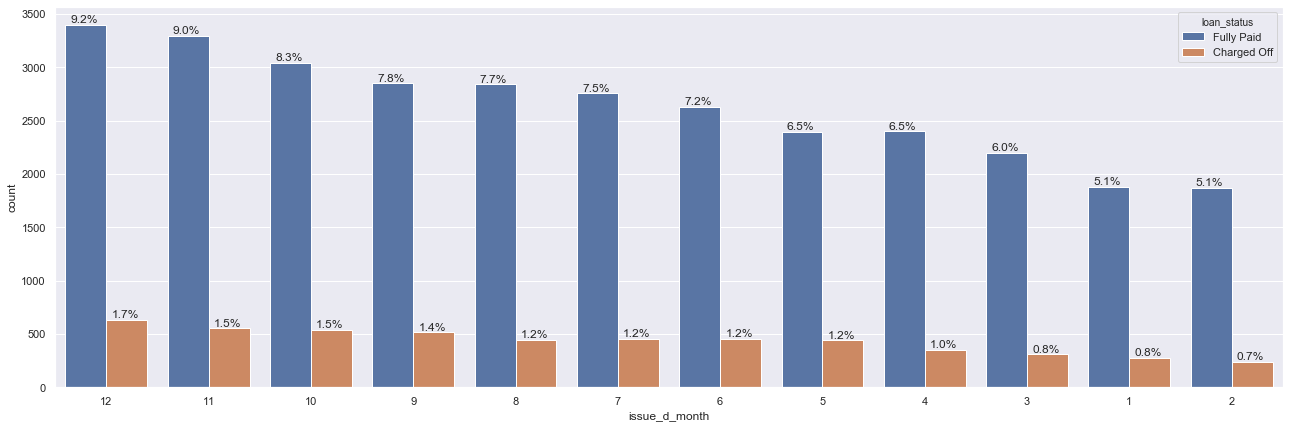

In [67]:
plot(clean_df,col='issue_d_month',col_type=1,hue='loan_status')

###### Observation: More applicants in Nov and Dec month. This may be because of Christmas and New Year

###### 7. issue_d_year

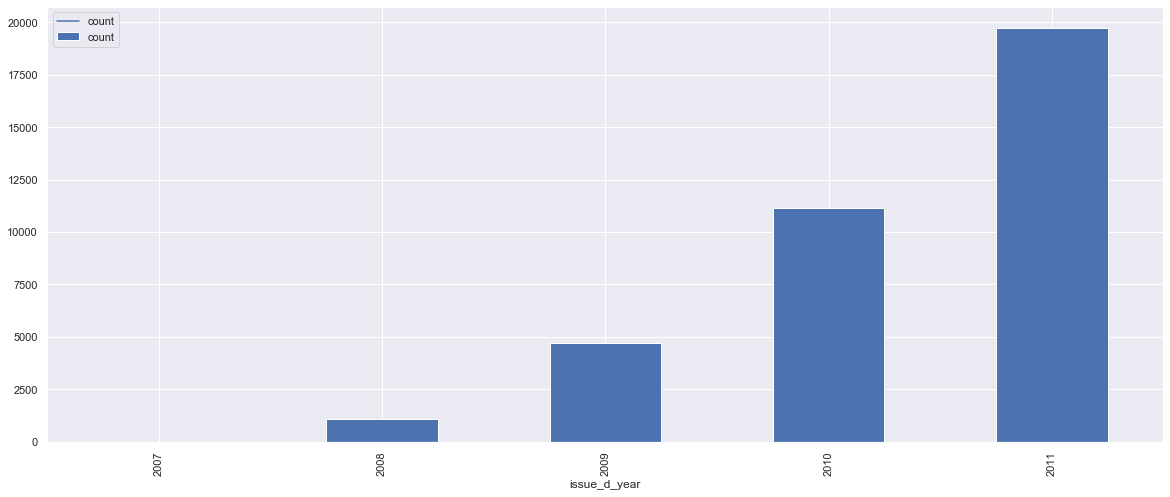

In [68]:
year_wise =clean_df.groupby(by= [clean_df.issue_d_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax = year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

###### Observation: loan applicants are increasing year on year

###### 8. loan_amnt

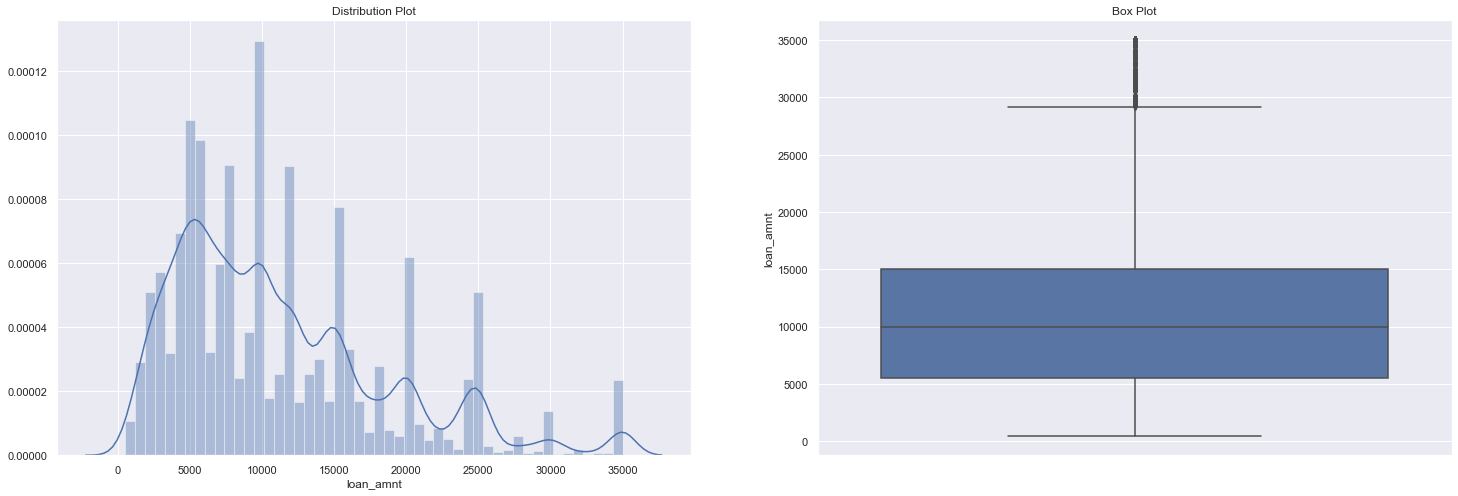

In [69]:
plot(df=clean_df,col='loan_amnt',col_type=0)

Observation: Most of the loan amounts are distributed between 6000 to 15000.

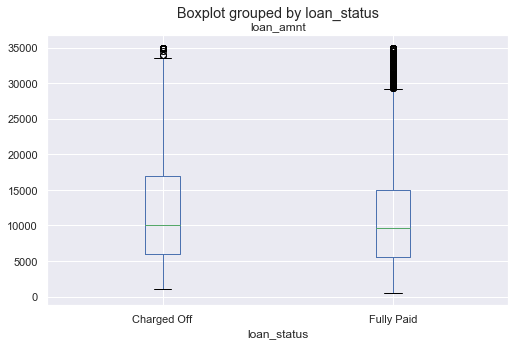

In [70]:
clean_df.boxplot(column=['loan_amnt'],by='loan_status', figsize=(8,5))

###### 9. int_rate

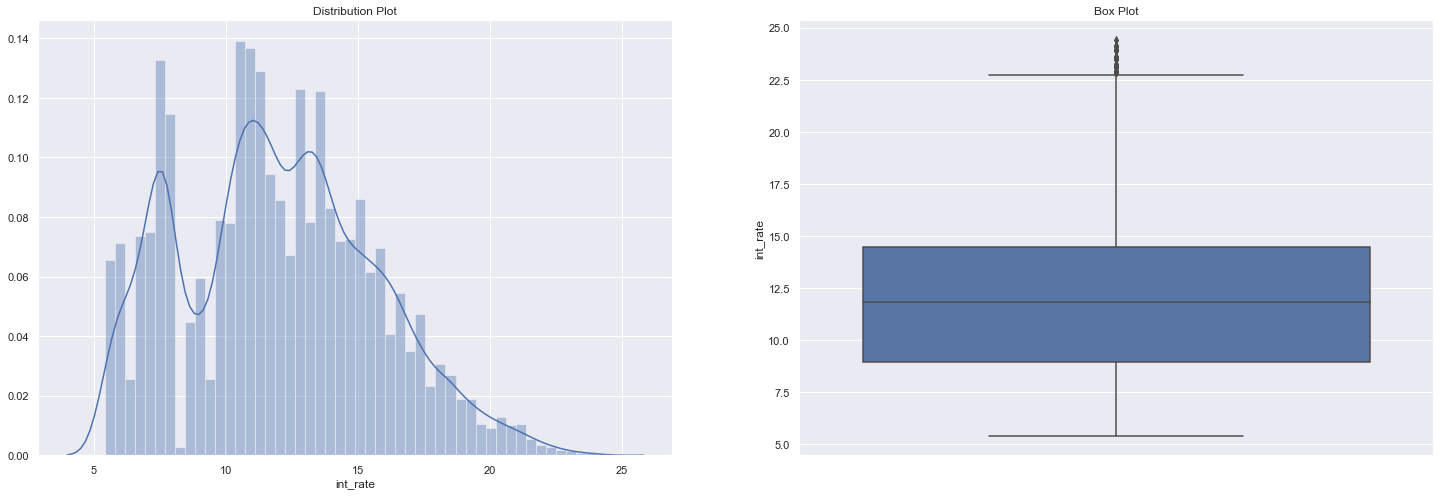

In [71]:
plot(df=clean_df,col='int_rate',col_type=0)

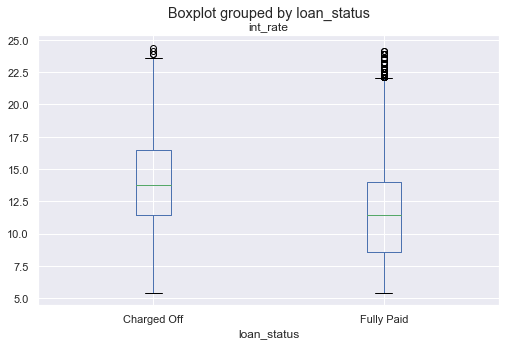

In [72]:
clean_df.boxplot(column=['int_rate'],by='loan_status', figsize=(8,5))

###### Observation: int_rate for defaulter applicant is higher comparatively 

In [73]:
clean_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,13.925054,3.656880,5.42,11.49,13.79,16.45,24.40
Fully Paid,31525.0,11.659022,3.608944,5.42,8.59,11.49,13.99,24.11


###### 10. purpose
Description: A category provided by the borrower for the loan request. 

In [74]:
purpose_wise = clean_df.groupby(['purpose', 'loan_status']).loan_amnt.count()
purpose_wise

purpose             loan_status
car                 Charged Off      151
                    Fully Paid      1278
credit_card         Charged Off      499
                    Fully Paid      4297
debt_consolidation  Charged Off     2595
                    Fully Paid     14748
educational         Charged Off       47
                    Fully Paid       245
home_improvement    Charged Off      316
                    Fully Paid      2415
house               Charged Off       56
                    Fully Paid       291
major_purchase      Charged Off      201
                    Fully Paid      1848
medical             Charged Off       99
                    Fully Paid       546
moving              Charged Off       81
                    Fully Paid       460
other               Charged Off      571
                    Fully Paid      3015
renewable_energy    Charged Off       17
                    Fully Paid        76
small_business      Charged Off      436
                    Fully

In [75]:
purpose_wise.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

purpose             loan_status
car                 Charged Off    10.566830
                    Fully Paid     89.433170
credit_card         Charged Off    10.404504
                    Fully Paid     89.595496
debt_consolidation  Charged Off    14.962809
                    Fully Paid     85.037191
educational         Charged Off    16.095890
                    Fully Paid     83.904110
home_improvement    Charged Off    11.570853
                    Fully Paid     88.429147
house               Charged Off    16.138329
                    Fully Paid     83.861671
major_purchase      Charged Off     9.809663
                    Fully Paid     90.190337
medical             Charged Off    15.348837
                    Fully Paid     84.651163
moving              Charged Off    14.972274
                    Fully Paid     85.027726
other               Charged Off    15.923034
                    Fully Paid     84.076966
renewable_energy    Charged Off    18.279570
                    Ful

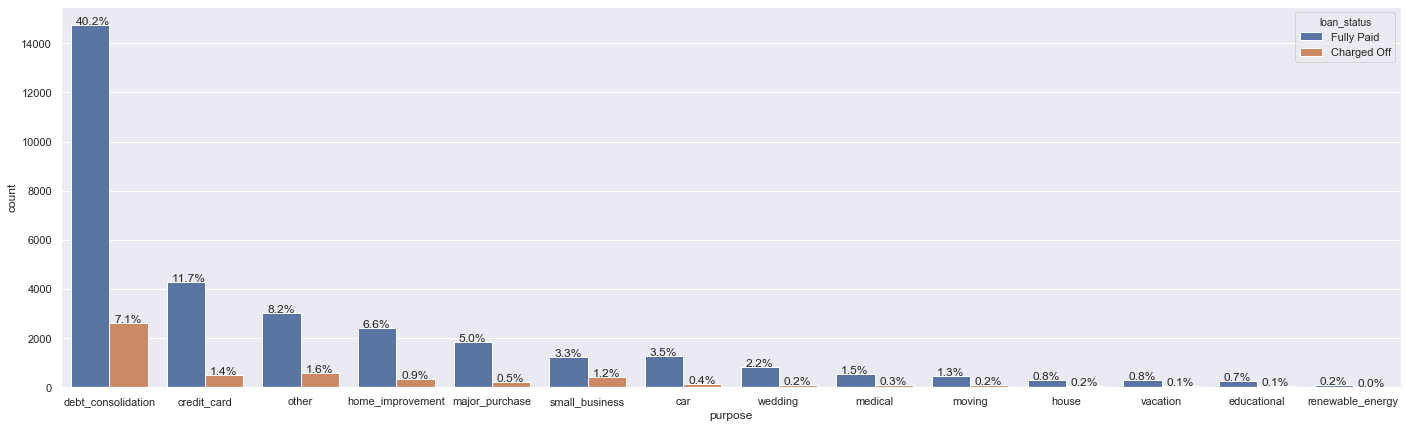

In [76]:
plot(clean_df,col='purpose',col_type=1,hue='loan_status')

###### debt_consolidation is by far the largest 'purpose' for seeking a loan
loan applied for small_business is more likely to be charged off as 26.5% out of total applicants who applied for small_business are marked as charged off.

###### 11. annual_inc
Description: The self-reported annual income provided by the borrower during registration.

In [77]:
clean_df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.672700e+04
mean     6.947194e+04
std      6.406963e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
90%      1.170000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

###### Observation:
- The annual income reprted by the applicants range from min of 4,000 to max of 6,000,000.
- Median annual income is around 60,000
- Most people have an annual income less than 115000

In [78]:
# get rid of outliers
clean_df[clean_df.annual_inc <= 117000].annual_inc.describe()

count     33085.000000
mean      57985.668973
std       23650.222032
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      117000.000000
Name: annual_inc, dtype: float64

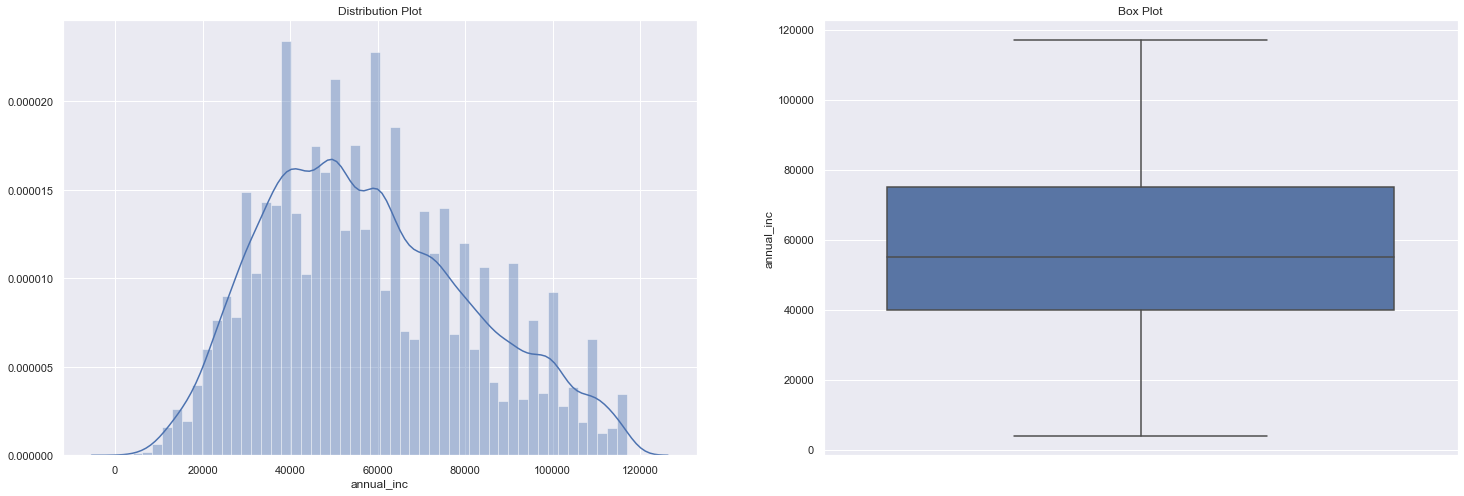

In [79]:
plot(df=clean_df[clean_df.annual_inc <= 117000],col='annual_inc',col_type=0)

In [80]:
clean_df[clean_df.annual_inc <= 117000].groupby('loan_status')['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,count,mean,std,min,10%,25%,50%,75%,90%,max
loan_status,,,,,,,,,,
Charged Off,4799.0,54378.371404,22732.694871,4080.0,27079.2,36696.0,51000.0,70000.0,87000.0,117000.0
Fully Paid,28286.0,58597.682726,23748.462598,4000.0,30000.0,40000.0,55000.0,75000.0,94000.0,117000.0


###### 12. addr_state
Description: The state provided by the borrower in the loan application

In [81]:
clean_df.addr_state.value_counts().head(10)

CA    6659
NY    3502
FL    2636
TX    2546
NJ    1727
IL    1427
PA    1423
VA    1303
GA    1292
MA    1229
Name: addr_state, dtype: int64

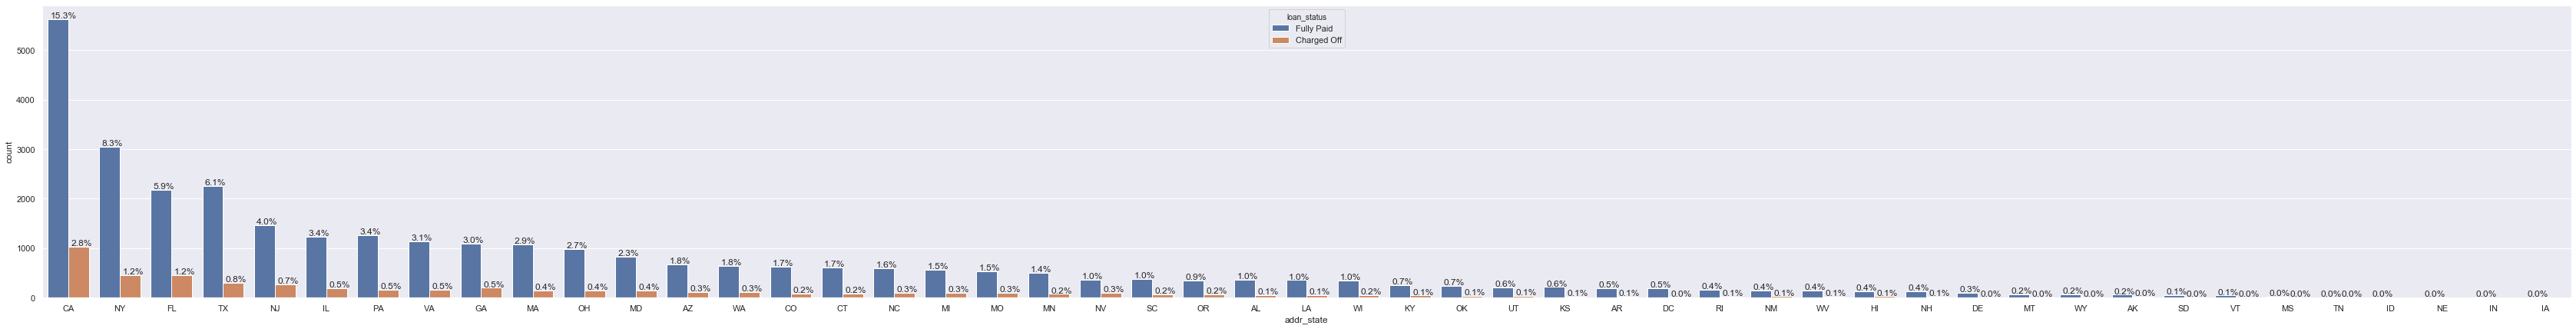

In [82]:
plot(clean_df,col='addr_state',col_type=1,hue='loan_status')

###### Observation:
Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. 
States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

###### 13. dti
Description: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [83]:
clean_df.dti.describe()

count    36727.000000
mean        13.337557
std          6.649275
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

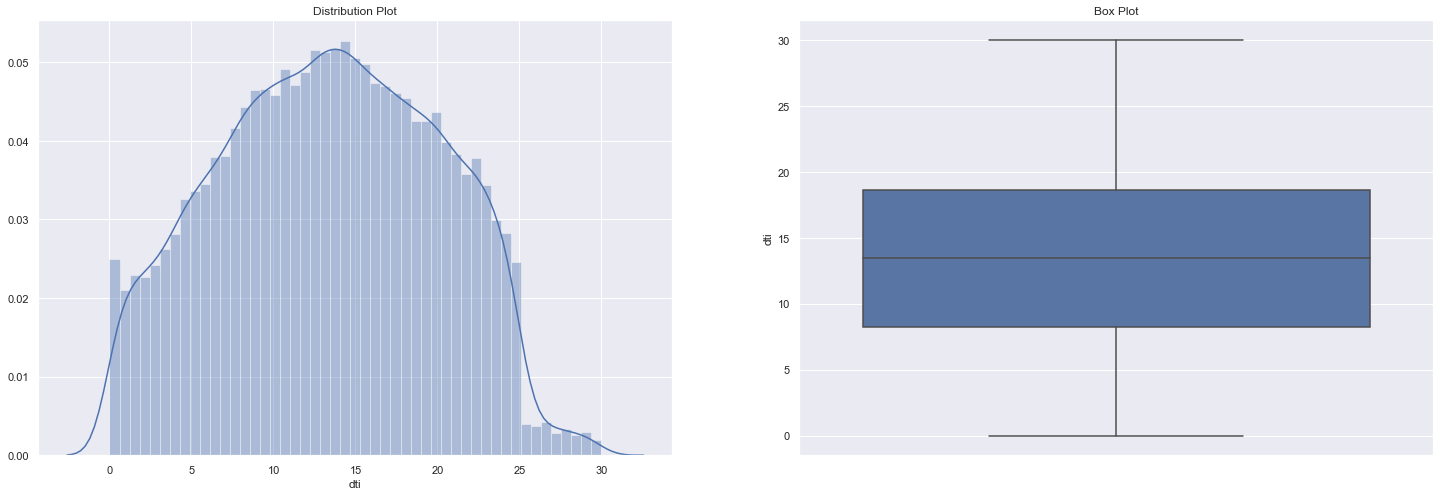

In [84]:
plot(df=clean_df,col='dti',col_type=0)

In [85]:

# Create derived variable 
clean_df['dti_bin'] = pd.cut(clean_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

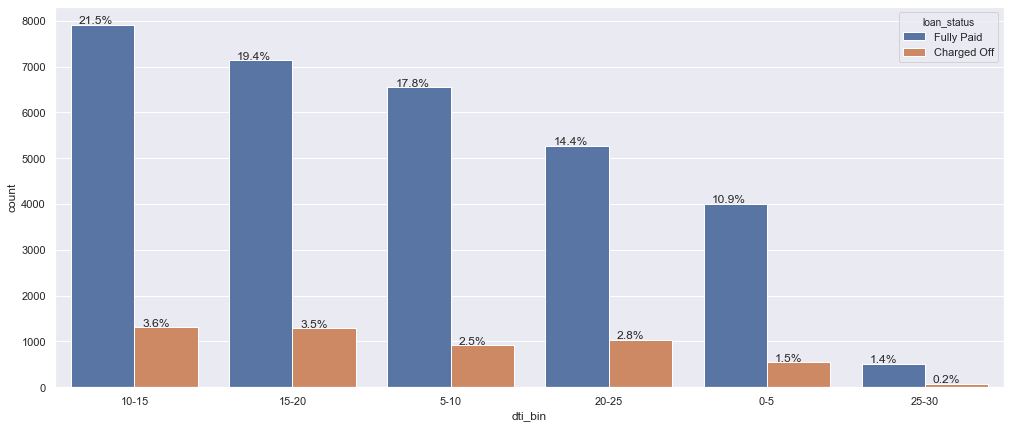

In [86]:
plot(clean_df,col='dti_bin',col_type=1,hue='loan_status')

In [87]:
# solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [88]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# We want to see what are the chances of some category leading to loan default

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('Set2', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

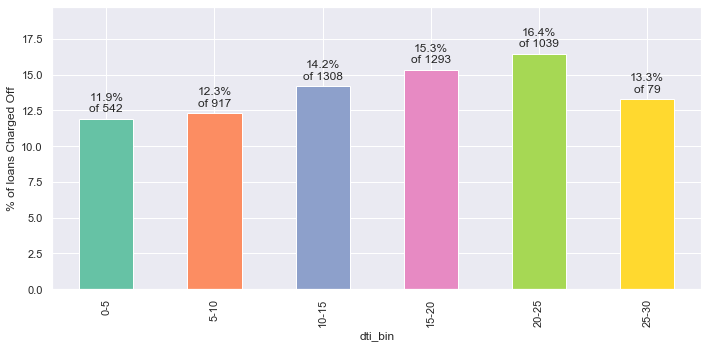

In [89]:
plt.figure(figsize=(10,5))
plotLoanStatus(clean_df, 'dti_bin')

###### Observation:
Higher the dti higher the chances of loan being Charged Off

###### 14. inq_last_6mths
Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [90]:
clean_df.inq_last_6mths.value_counts()

0    17833
1    10154
2     5384
3     2827
4      292
5      136
6       57
7       32
8       12
Name: inq_last_6mths, dtype: int64

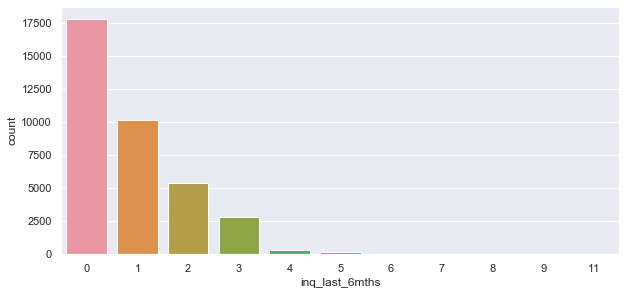

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.countplot(clean_df['inq_last_6mths'], order=sorted(clean_df.delinq_2yrs.unique()))

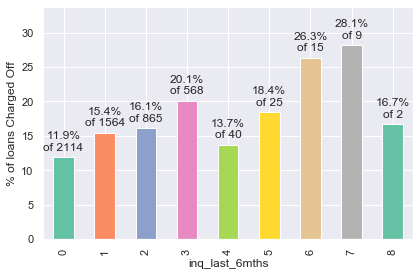

In [92]:
plotLoanStatus(clean_df, 'inq_last_6mths')

###### Observation:

Most of the applicants do not make any inquiry.
Those with more than 2 inquiries default at higher rates.

###### 15. pub_rec
Description: Number of derogatory public records. 

In [93]:
clean_df.pub_rec.value_counts(normalize=True)

0    0.947668
1    0.050862
2    0.001225
3    0.000191
4    0.000054
Name: pub_rec, dtype: float64

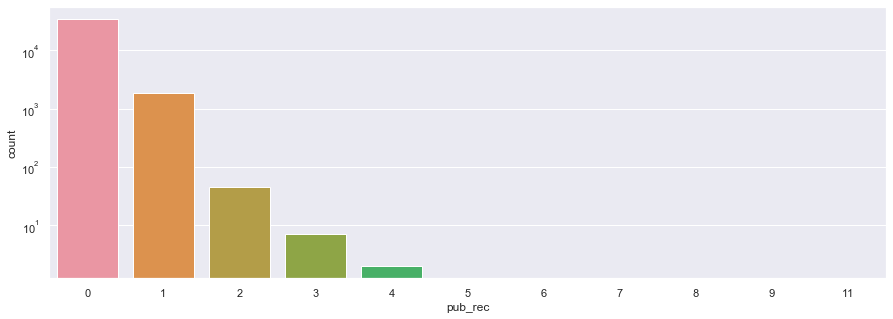

In [94]:
plt.figure(figsize=(15,5))
c=sns.countplot(clean_df['pub_rec'], order=sorted(clean_df.delinq_2yrs.unique()))
c.set_yscale('log')

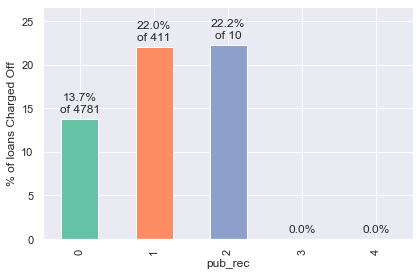

In [95]:
plotLoanStatus(clean_df, 'pub_rec')

###### Observation:

- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

###### 16. revol_bal
Description: Total credit revolving balance

In [96]:
clean_df.revol_bal.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     36727.000000
mean      13386.726958
std       15857.420519
min           0.000000
10%        1149.600000
25%        3735.000000
50%        8881.000000
75%       17040.000000
90%       29131.400000
95%       41546.800000
99%       83058.680000
max      149588.000000
Name: revol_bal, dtype: float64

In [97]:
# removing outliers
clean_df[clean_df.revol_bal <= 29132].revol_bal.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    33054.000000
mean      9307.421401
std       7296.658607
min          0.000000
10%        977.300000
25%       3281.000000
50%       7734.000000
75%      13901.000000
90%      20421.800000
95%      24035.750000
99%      27950.350000
max      29129.000000
Name: revol_bal, dtype: float64

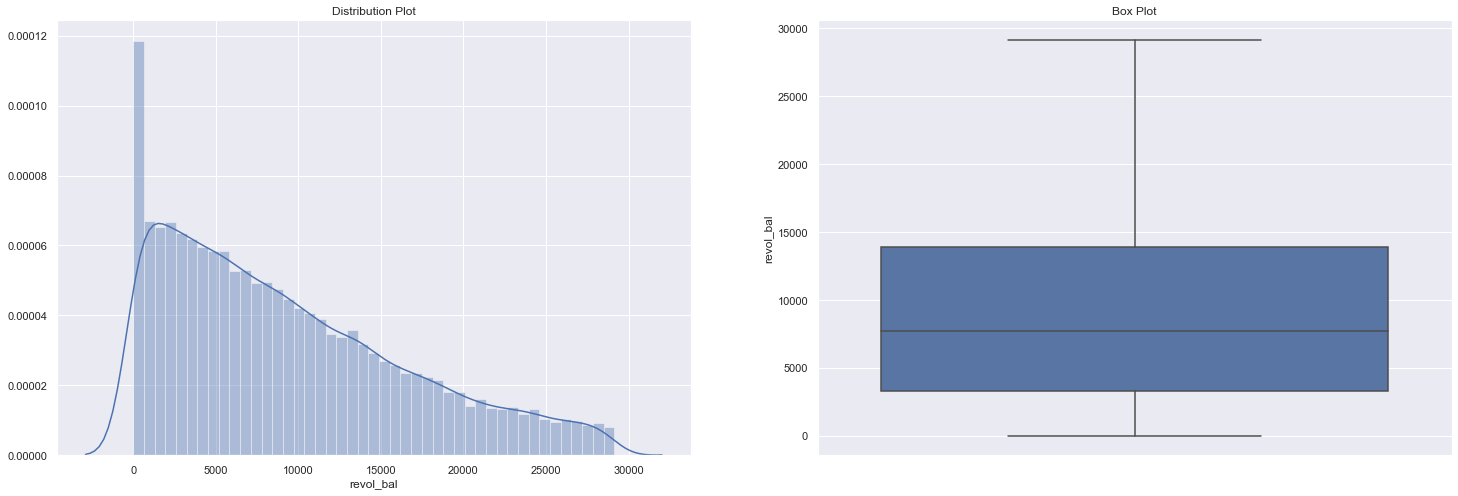

In [98]:
plot(df=clean_df[clean_df.revol_bal <= 29132],col='revol_bal',col_type=0)

In [99]:
clean_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5202.0,13725.102845,15164.521685,0.0,4180.25,9480.5,17731.75,147365.0
Fully Paid,31525.0,13330.890912,15968.410153,0.0,3667.00,8799.0,16916.00,149588.0


###### Observation:

There is no large difference in revolving balance mean for charged off an fully Paid loans

###### 17. revol_util
Description: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [100]:
clean_df.revol_util.describe()

count    36727.000000
mean        48.992707
std         28.311774
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

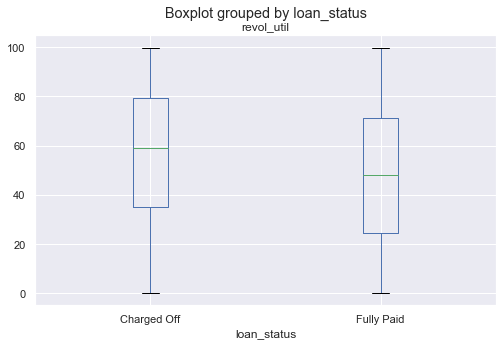

In [101]:
clean_df.boxplot(column=['revol_util'],by='loan_status', figsize=(8,5))

###### Observation:

The average utilization rate is around 49%

In [102]:
clean_df['revol_util_bin'] = round(clean_df['revol_util']/5)

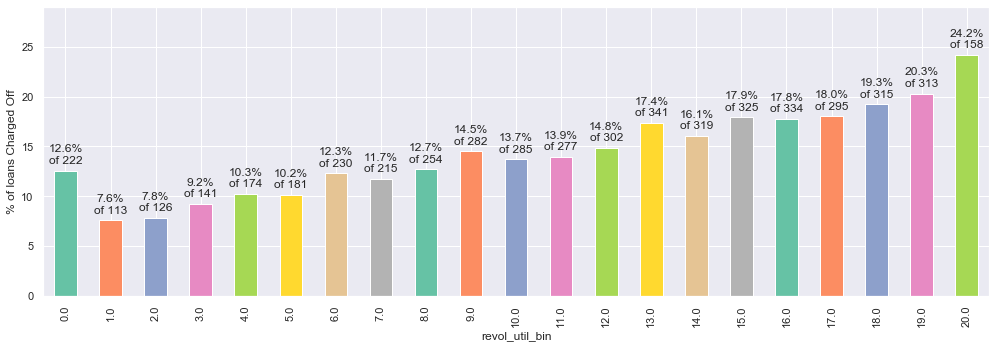

In [103]:
plt.figure(figsize=(14,5))
plotLoanStatus(clean_df, 'revol_util_bin')

###### 17. total_acc
Description: The total number of credit lines currently in the borrower's credit file.

In [104]:
clean_df.total_acc.describe()

count    36727.000000
mean        22.163558
std         11.407048
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

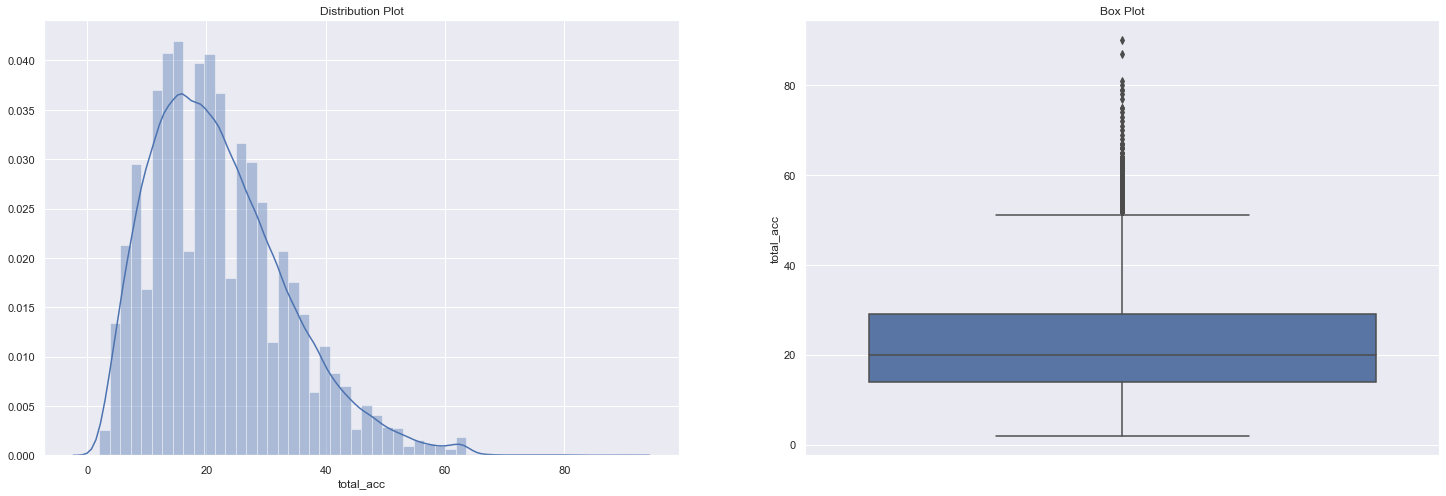

In [105]:
plot(df=clean_df, col='total_acc',col_type=0)

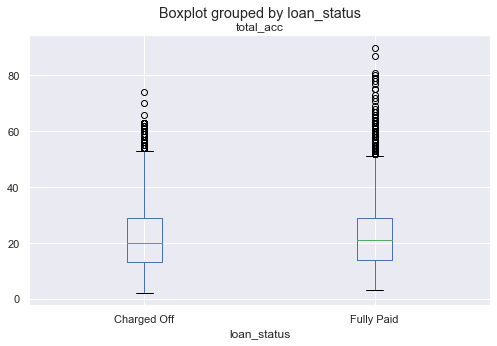

In [106]:
clean_df.boxplot(column=['total_acc'],by='loan_status', figsize=(8,5))

###### Observation:

- The are approx. 22 average credit lines for the applicants.
- There is no big difference between the Charged Off and Fully Paid.

###### Derived variable - ratio of loan amount to annual income

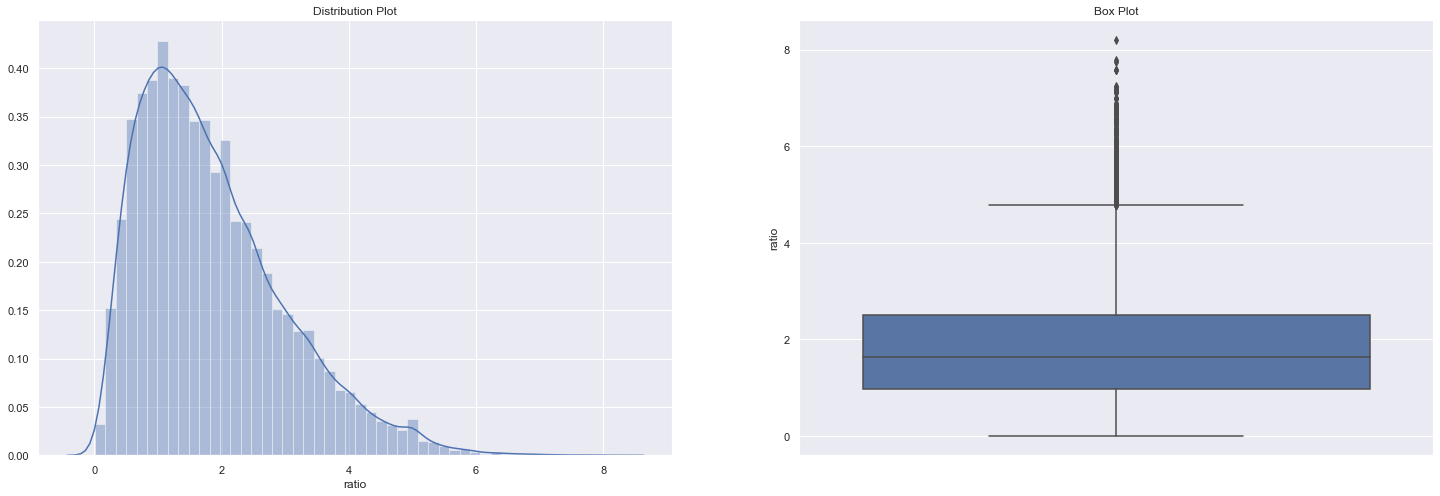

In [107]:
clean_df['ratio'] = clean_df['loan_amnt'] * 10 / clean_df['annual_inc']
plot(df=clean_df, col='ratio',col_type=0)

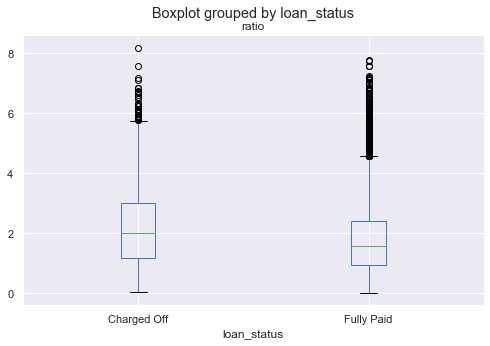

In [108]:
clean_df.boxplot(column=['ratio'],by='loan_status', figsize=(8,5))

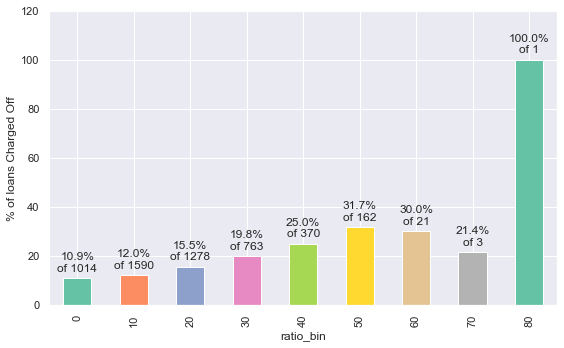

In [109]:
clean_df['ratio_bin'] = (clean_df['ratio'].astype(int)) * 10
plt.figure(figsize=(8,5))
plotLoanStatus(clean_df, 'ratio_bin')

###### Observation:

For loan amount less than 20% of annual income, defaults are low.

### Bivariate/Multivariate Analysis

###### Purpose of Loan vs Loan Amount

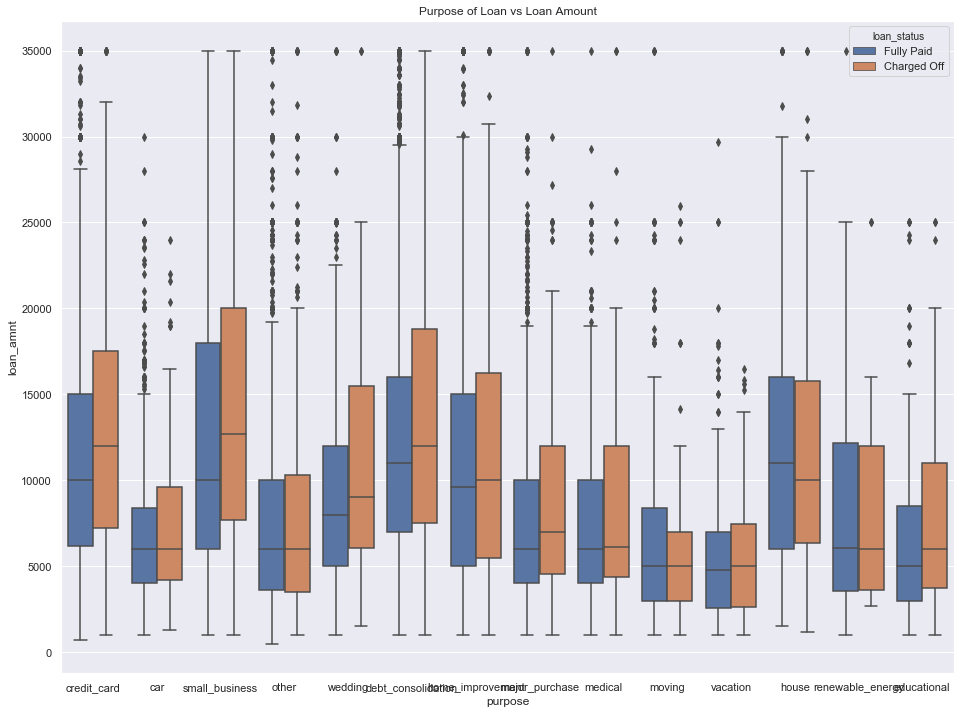

In [110]:
plt.figure(figsize=(16,12))
sns.boxplot(data =clean_df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

###### Interest Rate vs Term

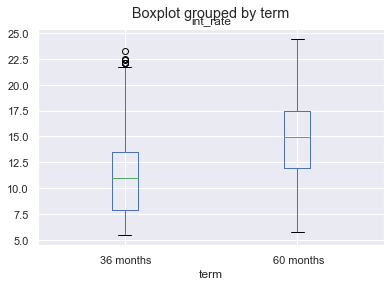

In [111]:
clean_df.boxplot(column='int_rate', by='term')

###### Correlation Matrix

In [112]:
corr = clean_df.corr()
corr['loan_amnt']

loan_amnt                   1.000000
int_rate                    0.300255
installment                 0.931099
emp_length                  0.148553
annual_inc                  0.269992
dti                         0.060250
delinq_2yrs                -0.034593
inq_last_6mths              0.010732
open_acc                    0.174085
pub_rec                    -0.046811
revol_bal                   0.315962
revol_util                  0.061389
total_acc                   0.255339
out_prncp                        NaN
out_prncp_inv                    NaN
total_pymnt                 0.883396
total_pymnt_inv             0.859701
total_rec_prncp             0.847349
total_rec_int               0.728220
total_rec_late_fee          0.048123
recoveries                  0.143281
collection_recovery_fee     0.077203
last_pymnt_amnt             0.475581
pub_rec_bankruptcies       -0.031519
issue_d_month               0.053297
issue_d_year                0.115912
earliest_cr_line_month     -0.014004
e

In [113]:
clean_df.out_prncp.value_counts()

0.0    36727
Name: out_prncp, dtype: int64

In [114]:
clean_df = clean_df.drop('out_prncp',axis=1)

In [115]:
clean_df.out_prncp_inv.value_counts()

0.0    36727
Name: out_prncp_inv, dtype: int64

In [116]:
clean_df = clean_df.drop('out_prncp_inv',axis=1)

In [117]:
corr = clean_df.corr()
corr['loan_amnt']

loan_amnt                   1.000000
int_rate                    0.300255
installment                 0.931099
emp_length                  0.148553
annual_inc                  0.269992
dti                         0.060250
delinq_2yrs                -0.034593
inq_last_6mths              0.010732
open_acc                    0.174085
pub_rec                    -0.046811
revol_bal                   0.315962
revol_util                  0.061389
total_acc                   0.255339
total_pymnt                 0.883396
total_pymnt_inv             0.859701
total_rec_prncp             0.847349
total_rec_int               0.728220
total_rec_late_fee          0.048123
recoveries                  0.143281
collection_recovery_fee     0.077203
last_pymnt_amnt             0.475581
pub_rec_bankruptcies       -0.031519
issue_d_month               0.053297
issue_d_year                0.115912
earliest_cr_line_month     -0.014004
earliest_cr_line_year      -0.194269
last_pymnt_d_month         -0.007400
l

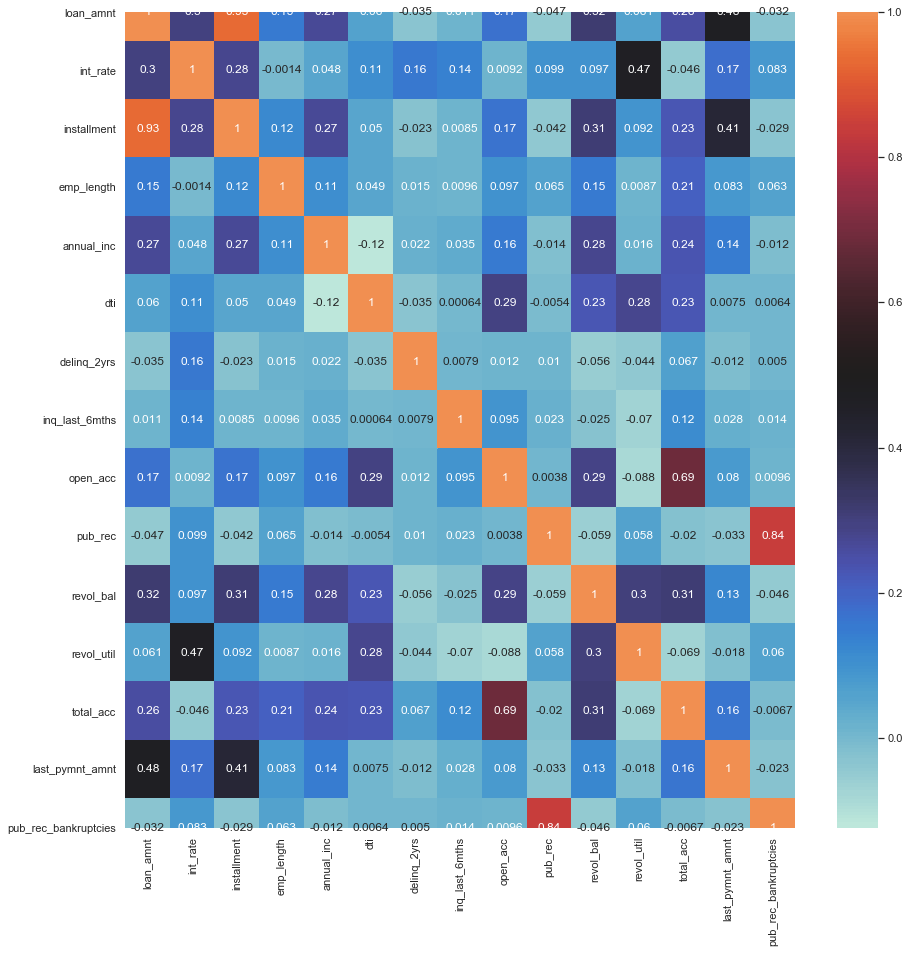

In [118]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = clean_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

###### Bivariate/Multivariate Analysis with Probability of Charge off

probability of charged off = no off applicants who charged off/total no of applicants

In [129]:
# cross tab reference - https://pbpython.com/pandas-crosstab.html
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['probability_charged_off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [130]:
# plot probability of charge off
def bivariate_prob_plot(df, col, stacked= True):
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['probability_charged_off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('probability of charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('no of applicants',color = 'g',fontsize=14)
    plt.show()

###### 1. addr_state vs probability of charged off 

In [131]:
states = clean_df.addr_state.value_counts()
states = states[(states < 10)]

loan_states = clean_df.drop(labels = clean_df[clean_df.addr_state.isin(states.index)].index)

loan_status,Charged Off,Fully Paid,All,probability_charged_off
addr_state,,,,
NJ,266,1461,1727,0.154
NM,29,144,173,0.168
NV,101,359,460,0.220
NY,454,3048,3502,0.130
OH,142,982,1124,0.126
OK,38,242,280,0.136
OR,68,346,414,0.164
PA,166,1257,1423,0.117
RI,25,165,190,0.132


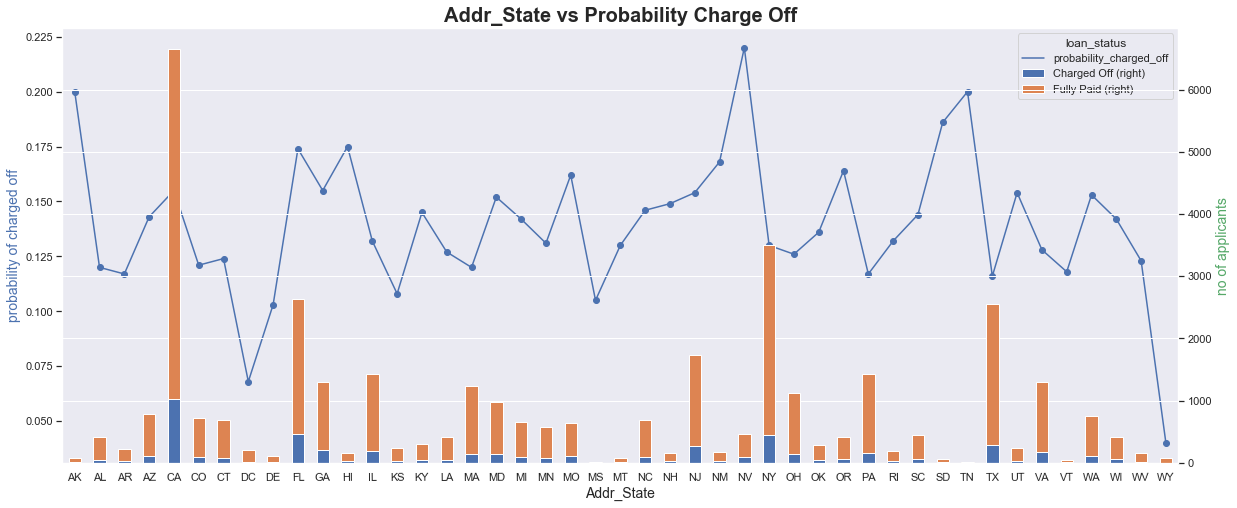

In [132]:
states = crosstab(loan_states,'addr_state')
display(states.tail(20))

bivariate_prob_plot(df=loan_states, col='addr_state')

Observation: There are multiple states with high probability of charged off, highest is 'NV' at 22.5%

###### 2. purpose of Loan vs probability Charge Off

loan_status,Charged Off,Fully Paid,All,probability_charged_off
purpose,,,,
car,151,1278,1429,0.106
credit_card,499,4297,4796,0.104
debt_consolidation,2595,14748,17343,0.150
educational,47,245,292,0.161
home_improvement,316,2415,2731,0.116
house,56,291,347,0.161
major_purchase,201,1848,2049,0.098
medical,99,546,645,0.153
moving,81,460,541,0.150


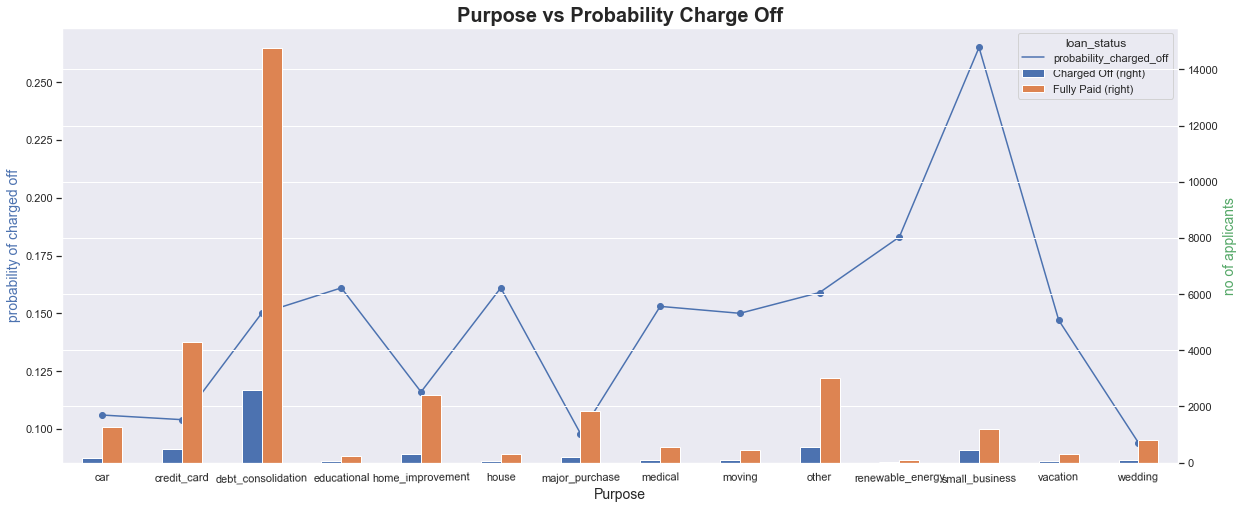

In [133]:
purpose = crosstab(clean_df,'purpose')
display(purpose)

bivariate_prob_plot(df =clean_df,col ='purpose',stacked=False)

###### Observation: 

Applicants who has taken the Loan for 'small business' has the highest probability of charge off of 26.5%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'
    

###### 3. grade/subgrade vs probability Charge Off

loan_status,Charged Off,Fully Paid,All,probability_charged_off
grade,,,,
A,546,8965,9511,0.057
B,1313,9820,11133,0.118
C,1229,6222,7451,0.165
D,1036,3800,4836,0.214
E,678,1888,2566,0.264
F,304,634,938,0.324
G,96,196,292,0.329


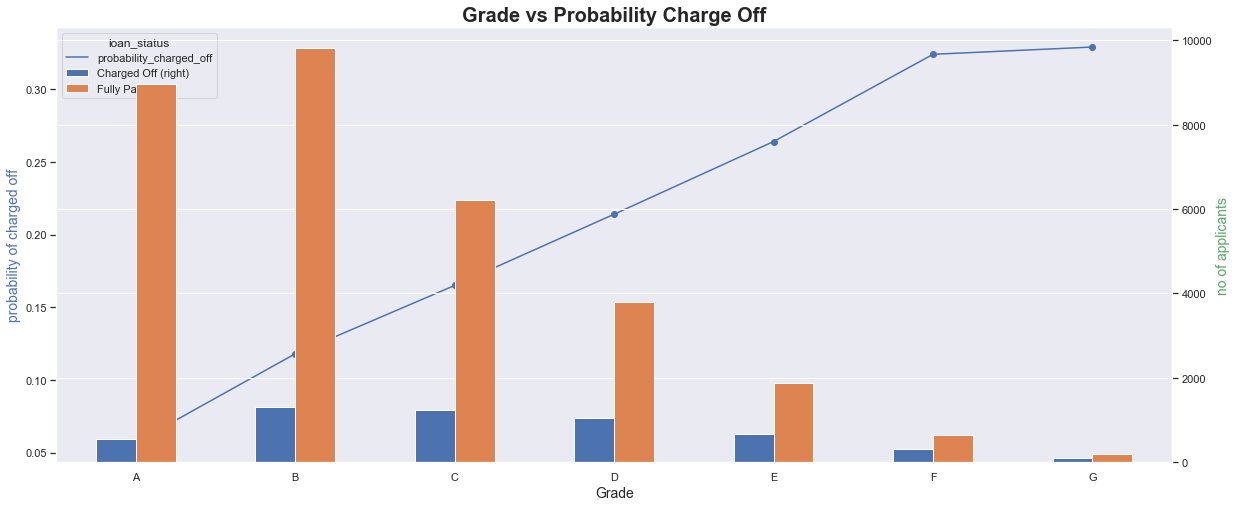

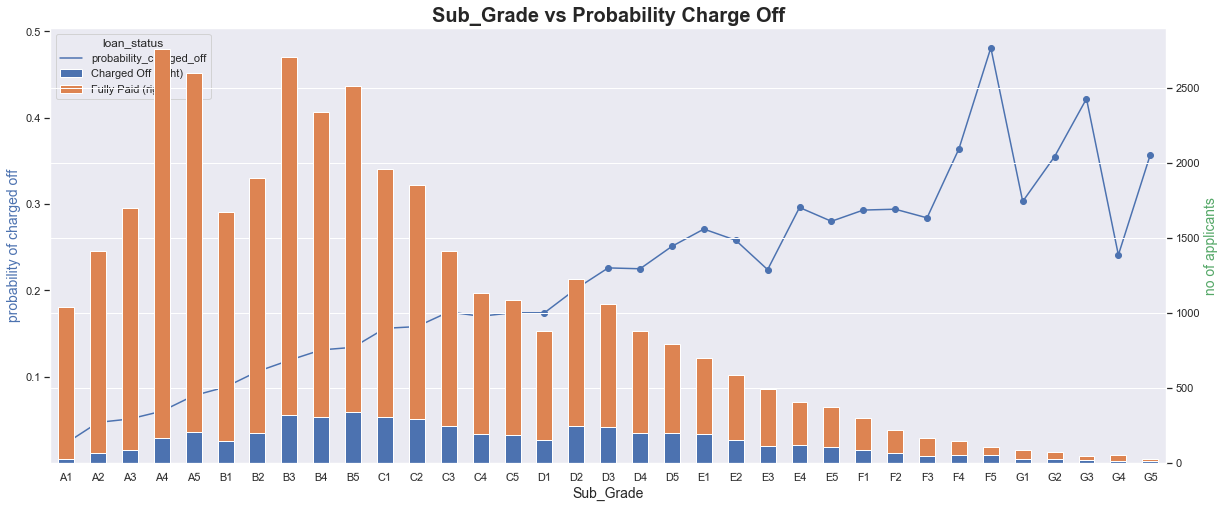

In [134]:
grade = crosstab(clean_df,'grade')
display(grade)

bivariate_prob_plot(df=clean_df, col='grade', stacked=False)
bivariate_prob_plot(df=clean_df, col='sub_grade')

Observation: from Grade A to G, probability that applicants will charged off is increasing.

###### 4. annual_inc vs probability Charge Off

In [135]:
# creating bins for range of annual_inc
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
clean_df['annual_inc_range'] = pd.cut(clean_df['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,probability_charged_off
annual_inc_range,,,,
0-25000,391,1778,2169,0.180
25000-50000,1951,10160,12111,0.161
50000-75000,1591,9657,11248,0.141
75000-100000,699,5169,5868,0.119
100000 and above,569,4749,5318,0.107


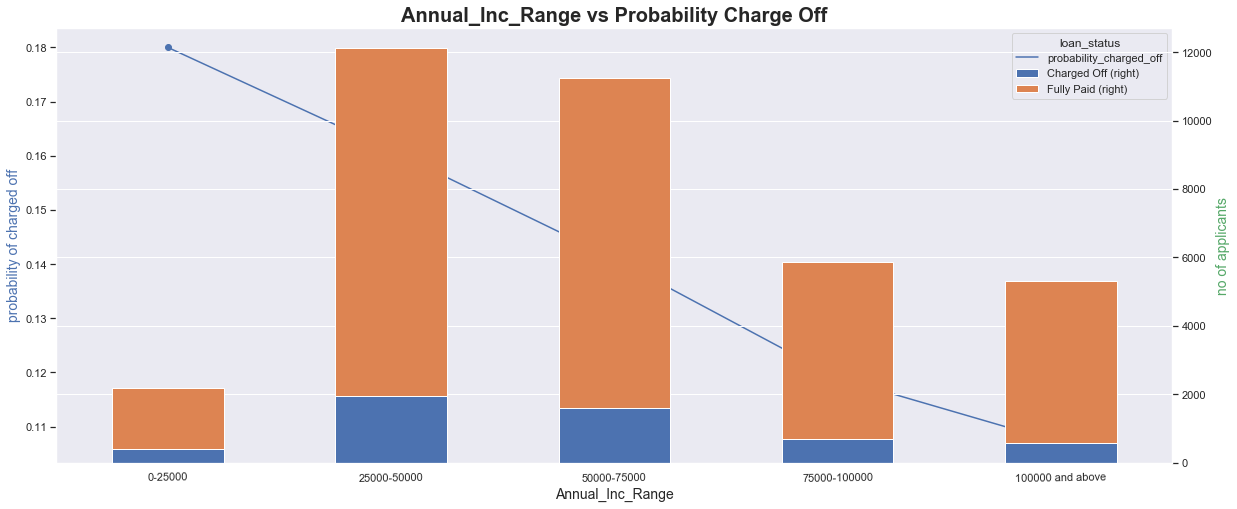

In [136]:
annual_inc_range = crosstab(clean_df, 'annual_inc_range')
display(annual_inc_range)

bivariate_prob_plot(df=clean_df, col ='annual_inc_range')

###### Observation: 

As the annual income decreases the probability that applicants will default is increasing with highest of 18% at (0 to 25000) salary bracket.

###### 5. int_rate Range vs probability Charge Of

In [137]:
# creating bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15,20]
labels = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
clean_df['int_rate_range'] = pd.cut(clean_df['int_rate'], bins, labels=labels)

loan_status,Charged Off,Fully Paid,All,probability_charged_off
int_rate_range,,,,
0-7.5,229,4841,5070,0.045
7.5-10,500,5967,6467,0.077
10-12.5,1116,7753,8869,0.126
12.5-15,1358,7205,8563,0.159
15 and above,1712,5290,7002,0.245


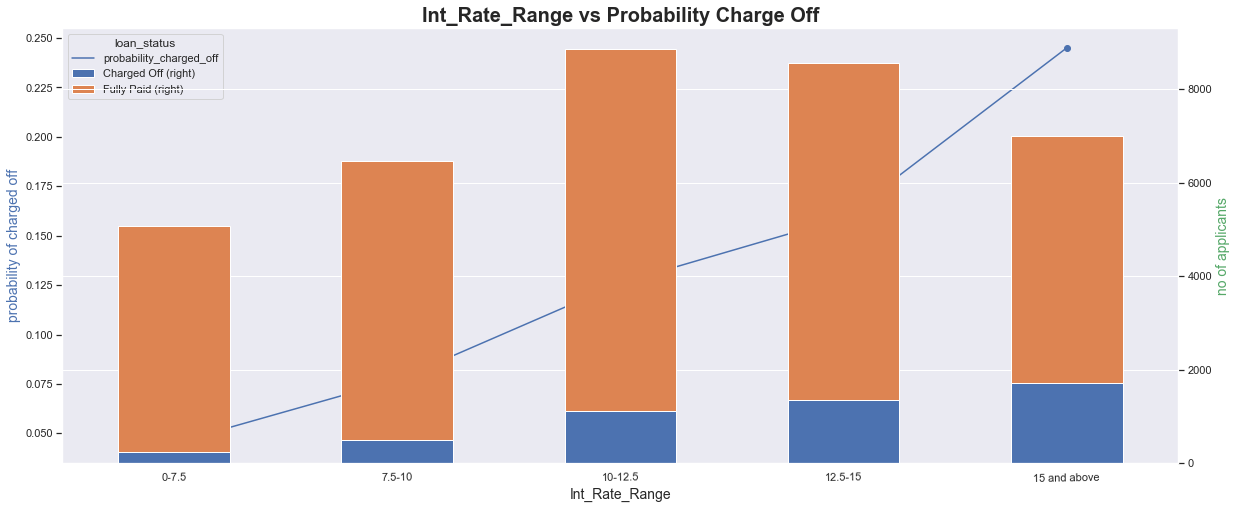

In [138]:
int_rate_range = crosstab(clean_df, 'int_rate_range')
display(int_rate_range)

bivariate_prob_plot(df=clean_df, col='int_rate_range')

Observation: 

As the int_rate is increasing the probability that person will default is increasing with highest of 24.5% at 15% & above range.